In [1]:
library(ggplot2)
library(reshape2)

# Problem 1

Basic definitions (from the prompt):

$P(thief) = P(L) = .001$

$P(detect|lying) = P(D|L) = .95$

$P(detect|truth) = P(D|\overline{L}) = .01$

By Bayes rule,

\begin{align}
P(L|D) &= \frac{P(D|L)P(L)}{P(D)} \\
 &= \frac{P(D|L)P(L)}{P(D|L)P(L) + P(D|\overline{L})P(\overline{L})}
\end{align}

Using the given values, 
\begin{align}
P(L|D) = \frac{.95*.001}{.95*.001+.01*.999}
\end{align}

In [2]:
.95*.001/(.95*.001+.01*.999)

[1] 0.08683729

# Problem 2

## A

First, note that $X = F^{-1}(U) \implies U = F(X)$.

Given the definition of a CDF, $P(X \leq x)$, for some random variable X:

\begin{align}
P(X \leq x) &= P(F^{-1}(U) \leq x) \\
  &= P(U \leq F(x)) \\
  &= F(X)
\end{align}

Therefore, the CDF of X is distributed as F.

## B

Using the definition of a CDF and the argument presented in A, the CDF of X is:

\begin{align}
P(X \leq x) &= P(-log(U) \leq x) \\
  &= P(log(U) \geq -x) \\
  &= P(U \geq e^{-x}) \\
  &= 1 - P(U \leq e^{-x}) \\
  &= 1 - e^{-x} \\
  &= F(x)
\end{align}

To obtain the PDF, differentiate $F(x)$, which yields:
\begin{align}
\frac{d}{dx}F(x) &= \frac{d}{dx}(1-e^{-x}) \\
  &= e^{-x}
\end{align}

Thus X follows an exponential distribution. To obtain $E(X)$, using integration by parts:

\begin{align}
E(X) &= \int_0^\infty \mathrm{e}^{-x}\,\mathrm{d}x \\
  &= \left.-x\mathrm{e}^{-x}\right|_0^\infty + \int_0^\infty \mathrm{e}^{-x}\,\mathrm{d}x \\
  &= 0 + \left.-\mathrm{e}^{-x}\right|_0^\infty \\
  &= 0 + -(0-1) = 1
\end{align}

Therefore, X follows an exponential distribution with $E(x)=1$.

## C

The distribution for $-log(U)$, where $U \sim Unif(0,1)$, produces similar results via simulation to $X$, where $X\sim exp(-x)$. Below is the PDF and CDF of U (black) and X (red).

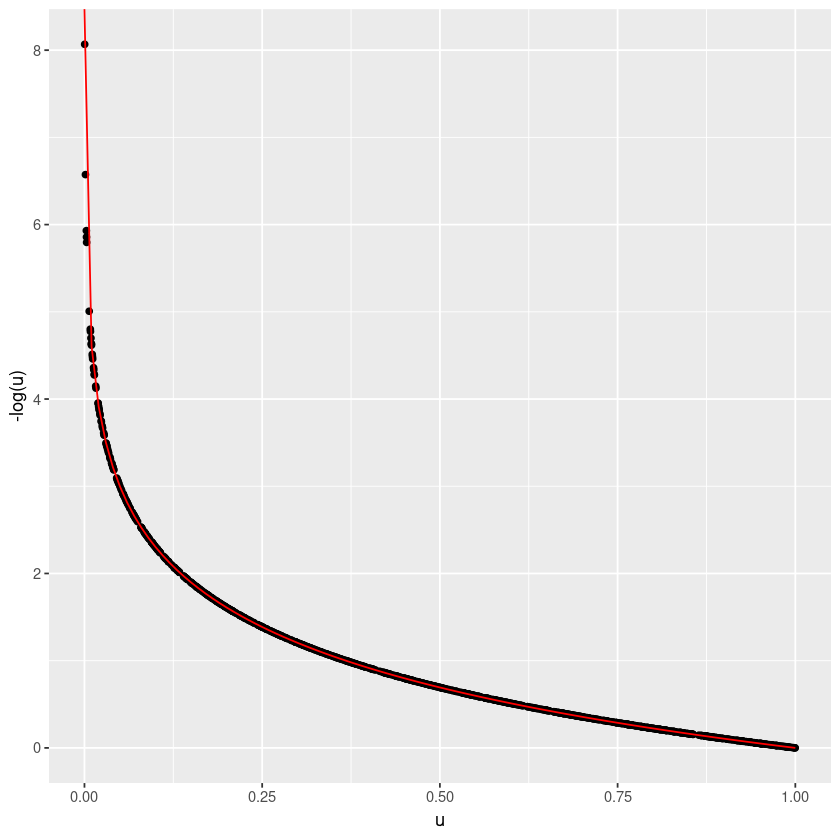

In [3]:
u = runif(1000)
x = seq(0,1,.01)
plt = ggplot() + geom_point(aes(u, -log(u))) + 
      geom_line(aes(x, -log(x)), color='red')
plt

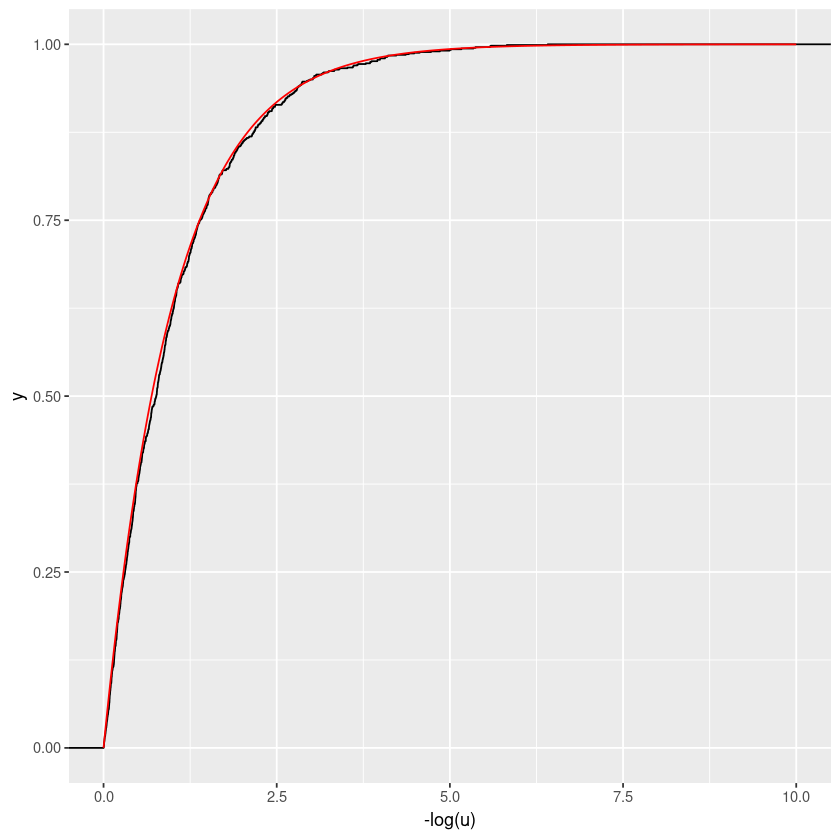

In [4]:
u = runif(1000)
x = seq(0,10,.01)

plt = ggplot() + stat_ecdf(aes(-log(u))) + 
      geom_line(aes(x, 1-exp(-x)), color='red')
plt

# Problem 3

## A

To compute the distribution of $X_{1} + X_{2}$, consider the moment-generating function (MGF) of a Poisson-distributed variable.

\begin{align}
MGF &= E[\mathrm{e}^{x t}] \\
  &= \sum_{x=0}^\infty {\mathrm{e}^{tx} \frac{\lambda^x \mathrm{e}^{-\lambda}}{x!} } \\
  &= \mathrm{e}^{-\lambda} \sum_{x=0}^\infty {(\mathrm{e^t \lambda})^{x} \frac{1}{x!} } \\
  &= \mathrm{e}^{-\lambda} \mathrm{e}^{\mathrm{e}^t \lambda} \\
  &= \mathrm{e}^{\lambda (\mathrm{e}^{t}-1)} \\
\end{align}

To obtain the distribution of $X_{1} + X_{2}$, multiply their corresponding MGFs:
\begin{align}
MGF_{\lambda_{1}} MGF_{\lambda_{2}} &= \mathrm{e}^{\lambda_{1} (\mathrm{e}^{t}-1)}  \mathrm{e}^{\lambda_{2} (\mathrm{e}^{t}-1)} \\
  &= \mathrm{e}^{(\lambda_{1} +\lambda_{2}) (\mathrm{e}^{t}-1)}
\end{align}

Therefore, $X_{1} + X_{2} \sim Poi(\lambda_{1} + \lambda_{2})$.

## B

From the definition of conditional probability, $P(A|B) = \frac{P(AB)}{P(B)}$, which in this case means:

\begin{align}
P(X_{1} = k|X_{1} + X_{2} = n) = \frac{P(X_{1} = k \cap X_{1} + X_{2} = n))}{P(X_{1} + X_{2} = n)}
\end{align}

Considering the numerator and denominator separately:
\begin{align}
P(X_{1} + X_{2} = n) = \mathrm{e}^{-(\lambda_{1} + \lambda_{2})} \frac{(\lambda_{1} + \lambda_{2})^{n}}{n!} \\
\end{align}

\begin{align}
P(X_{1} = k \cap X_{1} + X_{2} = n)) &= \mathrm{e}^{-\lambda_{1}}\frac{\lambda_{1}^{k}}{k!} \mathrm{e}^{-\lambda_{2}}\frac{\lambda_{2}^{n-k}}{(n-k)!} \\
  &= \mathrm{e}^{-(\lambda_{1} + \lambda_{2})} \frac{\lambda_{1}^{k}\lambda_{2}^{n-k}}{k!(n-k)!}
\end{align}

Combining the two yields:

\begin{align}
P(X_{1} = k|X_{1} + X_{2} = n) &= \frac{\mathrm{e}^{-(\lambda_{1} + \lambda_{2})} \frac{\lambda_{1}^{k}\lambda_{2}^{n-k}}{k!(n-k)!}}{\mathrm{e}^{-(\lambda_{1} + \lambda_{2})} \frac{(\lambda_{1} + \lambda_{2})^{n}}{n!}} \\
  &= \frac{n!}{k!(n-k)!} \frac{\lambda_{1}^{k}\lambda_{2}^{n-k}}{(\lambda_{1} + \lambda_{2})^{n}} \\
  &= \frac{n!}{k!(n-k)!} \frac{\lambda_{1}^{k}\lambda_{2}^{n-k}}{(\lambda_{1} + \lambda_{2})^{k} (\lambda_{1} + \lambda_{2})^{n-k}} \\
  &= \frac{n!}{k!(n-k)!} \Big(\frac{\lambda_{1}}{\lambda_{1} + \lambda_{2}}\Big)^{k} \Big(\frac{\lambda_{2}}{\lambda_{1} + \lambda_{2}}\Big)^{n-k} \\
  &= \frac{n!}{k!(n-k)!} \Big(\frac{\lambda_{1}}{\lambda_{1} + \lambda_{2}}\Big)^{k} \Big(1-\frac{\lambda_{1}}{\lambda_{1} + \lambda_{2}}\Big)^{n-k}
\end{align}

Therefore, $P(X_{1} = k|X_{1} + X_{2} = n)$ follows a Binomial distribution.

# Problem 4

## A

Given $\hat{\mu}_{m} = \frac{1}{m} \displaystyle\sum_{i=1}^{m} X_i$ and $\sigma^{2} = Var(X)$, the solution for $Var(\hat{\mu}_{m})$ is as follows:

\begin{align}
Var(\hat{\mu}_{m}) &= Var\Big(\frac{1}{m} \displaystyle\sum_{i=1}^{m} X_i\Big) \\
  &= \frac{1}{m^{2}} Var\Big(\displaystyle\sum_{i=1}^{m} X_i\Big) \\
  &= \frac{1}{m^{2}} \displaystyle\sum_{i=1}^{m} Var(X_i) \\
  &= \frac{1}{m^{2}} m \sigma^{2} \\
  &= \frac{\sigma^{2}}{m}
\end{align}

## B

\begin{align}
Var(X) &= E[X^{2}] - E[X]^{2} = E[X^{2}] - \mu^{2}
\end{align}

To obtain an estimate of $Var(X)$, called $\hat{\sigma}^{2}$, use the law of large numbers to compute the variance M samplings of random variable X. Use $\hat\mu_{m}$ for the mean when computing variance.

\begin{align}
\hat{\sigma}^{2} &= \frac{1}{m} \Big(\sum_{i=1}^{m}{X_{i}^{2}}\Big) - \hat\mu_{m}^{2} \\
\end{align}

## C

By using $\hat{\sigma}^{2}$ as an estimate for $\sigma^{2}$, one can combine A and B to directly compute $Var(\mu_{m})$:

\begin{align}
Var(\mu_{m}) &= \frac{\sigma^{2}}{m} \rightarrow \frac{\hat\sigma^{2}}{m} \\
\frac{\hat\sigma^{2}}{m} &= \frac{1}{m} \Big( \frac{1}{m} \Big(\sum_{i=1}^{m}{X_{i}^{2}}\Big) - \hat{\mu}_{m}^{2} \Big) \\
  &= \frac{1}{m^{2}} \Big(\sum_{i=1}^{m}{X_{i}^{2}}\Big) - \frac{\hat\mu_{m}^{2}}{m}
\end{align}

## D

The estimate for $Var(X)$ computed in B is biased. 

\begin{align}
E(\hat\sigma^2) &= E\big(\frac{1}{m}\sum_1^m{X_{i}^2}\big) - E(\mu_m^2) \\
  &= E(X^2) - E\Big(\frac{1}{m} \sum_{i=1}^{m} X_i\Big)^2 \\
  &= E(X^2) - \frac{1}{m^2}E\Big(\sum_{i=1}^{m} X_i^2 + \sum_{i\neq j} \sum_{j} X_i X_j \Big) \\
  &= E(X^2) - \frac{1}{m^2}\sum_{i=1}^{m} E(X_i^2) - \sum_{i\neq j} \sum_{j} E(X_i X_j) \\
  &= E(X^2) - \frac{E(X^2)}{m} - \frac{1}{m^2}\sum_{i\neq j} \sum_{j} \mu^2 \\
  &= \frac{m-1}{m}E(X^2) - \frac{m^2 - m}{m^2}\mu^2 \\
  &= \frac{m-1}{m}E(X^2) - \frac{m - 1}{m}\mu^2 \\
  &= \frac{m-1}{m}(\sigma^2 + \mu^2) - \frac{m - 1}{m}\mu^2 \\
  &= \frac{m-1}{m}\sigma^2 \\
\implies E(\hat\sigma^2) &\neq \sigma^2
\end{align}

To use an unbiased estimator, compute the sample variance instead:

\begin{align}
S^{2} &= \frac{1}{m-1}\sum_{i=1}^{m}\Big({X_{i} - \hat{\mu}_{m}^{2}}\Big)
\end{align}

# Problem 5

## A

Given that $P(\Pi|T_{2}) \sim Poi(2\mu T_{2})$, $E(P(\Pi|T_{2}))$ and $Var(P(\Pi|T_{2}))$ are both equal to $2\mu T_{2}$ because the mean and variance of a Poisson-distributed random variable are both equal to Poisson parameter $\lambda$, which here is equal to $2\mu T_{2}$.

Using the definition of conditional expectation:

\begin{align}
E(\Pi) &= E_{T_{2}}\big(E(\Pi|T_{2})\big) = E_{T_{2}}\big(2\mu T_{2}\big) \\
  &= \int_0^\infty{2\mu T_{2} \frac{1}{2N} \mathrm{e}^{\frac{-T_{2}}{2N}} \mathrm{d}T_{2} } \\
  &= 2\mu \int_0^\infty{T_{2} \frac{1}{2N} \mathrm{e}^{\frac{-T_{2}}{2N}} \mathrm{d}T_{2} } \\
  &= 2\mu \Big( \left.-T_{2} \mathrm{e}^{\frac{-T_{2}}{2N}} \right|_0^\infty + \int_0^\infty{\mathrm{e}^{\frac{-T_{2}}{2N}} \mathrm{d}T_{2} } \Big)\\
  &= 2\mu \Big( 0 + \left.\big(-2N \mathrm{e}^{\frac{-T_{2}}{2N}}\big)\right|_0^\infty \Big)\\
  &= 4\mu N
\end{align}


## B

Using the definition of conditional variance:

\begin{align}
Var(\Pi) &= E_{T_{2}}\big(Var(\Pi|T_{2})\big) + Var_{T_{2}}\big(E(\Pi|T_{2})\big) \\
 &= E_{T_{2}}\big(2\mu T_{2}\big) + Var_{T_{2}}\big(2\mu T_{2}\big)
\end{align}

Computing $E_{T_{2}}\big(2\mu T_{2}\big)$ and $Var_{T_{2}}\big(2\mu T_{2}\big)$ separately:

\begin{align}
E_{T_{2}}\big(2\mu T_{2}\big) &= 4\mu N
\end{align}

\begin{align}
Var_{T_{2}}\big(2\mu T_{2}\big) &= E(2\mu T_{2})^{2} - (E(2\mu T_{2}))^{2} \\
  &= E(2\mu T_{2})^{2} - (4\mu N)^{2} \\
E(2\mu T_{2})^{2} &= \int_0^\infty{4\mu^{2}T_{2}^{2}\frac{1}{2N} \mathrm{e}^{\frac{-T_{2}}{2N}} \mathrm{d}T_{2} } \\
  &= 4\mu^{2} \int_0^\infty{\frac{T_{2}^{2}}{2N} \mathrm{e}^{\frac{-T_{2}}{2N}} \mathrm{d}T_{2} } \\
  &= 4\mu^{2} \Big( \left.-T^{2}_{2}\mathrm{e}^{\frac{-T_{2}}{2N}}\right|_0^\infty + 2 \int_0^\infty{T_2 \mathrm{e}^{\frac{-T_{2}}{2N}} \mathrm{d}T_{2}} \Big) \\
  &= 4\mu^{2} \Big( 0 + 2 \big(\left.-T_{2}2N\mathrm{e}^{\frac{-T_{2}}{2N}}\right|_0^\infty + \int_0^\infty{2N \mathrm{e}^{\frac{-T_{2}}{2N}} \mathrm{d}T_{2}} \big) \Big) \\
  &= 8\mu^{2} \Big( 0 + \left.\big(-4N^2\mathrm{e}^{\frac{-T_{2}}{2N}}\right|_0^\infty\big) \Big) \\
  &= 8\mu^2 4N^2 = 32\mu^2 N^2 = 2(4\mu N)^2 \\
  \implies Var_{T_{2}}\big(2\mu T_{2}\big) &= 2(4\mu N)^2 - (4\mu N)^{2} \\
  &= (4\mu N)^{2} \\
\end{align}

Combining terms:
\begin{align}
Var(\Pi) &= E_{T_{2}}\big(2\mu T_{2}\big) + Var_{T_{2}}\big(2\mu T_{2}\big) \\
  &= 4\mu N + (4\mu N)^{2}
\end{align}

## C

$E(\Pi)$ and $Var{\Pi}$ are not linearly related, as they would be in a Poisson-distributed system. There is a quadratic term in the variance.

Given that $(4\mu N)^{2}$ is positive and non-zero, $Var(\Pi) \gt E(\Pi)$, meaning that the variance is greater than would be expected if pairwise difference were Poisson-distributed.